In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
with open("data/data_summoner_match_data_야식은치킨이지.json", 'r') as file:
    raw_data = json.load(file)

In [112]:
df = pd.json_normalize(raw_data)
df_meta = df.iloc[:, 1:3]
df_meta.columns = ['matchId', 'participants']
df_info = df.iloc[:, 3:]
df_info.columns = raw_data[0]['info'].keys()

In [4]:
arr_teams = df_info.pop('teams')

In [5]:
arr_participants = df_info.pop('participants')

In [6]:
df_teams = pd.concat([pd.json_normalize(arr_teams[x]) for x in range(len(raw_data))])
df_teams.index = range(len(raw_data)*2)

In [7]:
df_participants = pd.concat([pd.json_normalize(arr_participants[x]) for x in range(len(raw_data))])
df_participants.index = range(len(raw_data)*10)

## now we have 
- df_meta
- df_info
- df_teams
- df_participants

In [8]:
print(
    df_meta.columns, 
    df_info.columns,
    df_teams.columns,
    df_participants.columns,
    sep='\n')

Index(['matchId', 'participants'], dtype='object')
Index(['gameCreation', 'gameDuration', 'gameId', 'gameMode', 'gameName',
       'gameStartTimestamp', 'gameType', 'gameVersion', 'mapId', 'platformId',
       'queueId', 'tournamentCode'],
      dtype='object')
Index(['bans', 'teamId', 'win', 'objectives.baron.first',
       'objectives.baron.kills', 'objectives.champion.first',
       'objectives.champion.kills', 'objectives.dragon.first',
       'objectives.dragon.kills', 'objectives.inhibitor.first',
       'objectives.inhibitor.kills', 'objectives.riftHerald.first',
       'objectives.riftHerald.kills', 'objectives.tower.first',
       'objectives.tower.kills'],
      dtype='object')
Index(['assists', 'baronKills', 'bountyLevel', 'champExperience', 'champLevel',
       'championId', 'championName', 'championTransform',
       'consumablesPurchased', 'damageDealtToBuildings',
       ...
       'unrealKills', 'visionScore', 'visionWardsBoughtInGame', 'wardsKilled',
       'wardsPlace

In [9]:
with open("data/data_summoner_야식은치킨이지.json", 'r') as file:
    summoner_puuid = json.load(file)["puuid"]
summoner_puuid

'mX__RNvnhclbNgyGz8tK9-TcnJRwHeTk0FyHL2jOJe6MU6WKNvwCkdfaaLJaZzujUoz5YACjf6-p_g'

In [10]:
df_meta['summonerIndex'] = df_meta.participants.map(lambda participants : participants.index(summoner_puuid))
df_meta.head()

,matchId,participants,summonerIndex
0,KR_5383029593,[rUTte1LB7uqx7-Be9GDunKU58Cvda2Hl3zslnmrD35alP...,6
1,KR_5383081525,[FMr_19OZMaYzwkkUXY2ILgKlspRcKpW_m3Ich7aZQNmCO...,5
2,KR_5382976870,[mX__RNvnhclbNgyGz8tK9-TcnJRwHeTk0FyHL2jOJe6MU...,0
3,KR_5382817808,[R9gC34TdorS8Ry23GXmm46K5jLi6-hCary5cX3XA4Oko7...,3
4,KR_5382882767,[Y97ddFWUFhOEUA0ULYUc-jlBVe_sQROMuOVQQdCwCLREI...,5


# 승률

In [11]:
df_teams.head()

,bans,teamId,win,objectives.baron.first,objectives.baron.kills,objectives.champion.first,objectives.champion.kills,objectives.dragon.first,objectives.dragon.kills,objectives.inhibitor.first,objectives.inhibitor.kills,objectives.riftHerald.first,objectives.riftHerald.kills,objectives.tower.first,objectives.tower.kills
0,[],100,True,False,0,True,40,False,0,False,0,False,0,True,2
1,[],200,False,False,0,False,27,False,0,False,0,False,0,False,0
2,[],100,True,False,0,False,40,True,4,False,0,True,1,True,5
3,[],200,False,False,0,True,24,False,1,False,0,False,0,False,3
4,[],100,False,False,0,False,15,True,1,False,0,False,0,False,0


In [12]:
# 나는 어떤 팀이었을까
is_redteam = [int(x >= 5) for x in df_meta.summonerIndex]
teams_index = [x*2+is_redteam[x] for x in range(len(raw_data))]

In [13]:
win_sum = sum(df_teams.win[teams_index])
win_rate = win_sum / len(raw_data)
print(win_sum, win_rate)

53 0.53


# 레드팀 / 블루팀 각 횟수와 승률

In [14]:
df_myteam = df_teams.iloc[teams_index]
df_myteam

,bans,teamId,win,objectives.baron.first,objectives.baron.kills,objectives.champion.first,objectives.champion.kills,objectives.dragon.first,objectives.dragon.kills,objectives.inhibitor.first,objectives.inhibitor.kills,objectives.riftHerald.first,objectives.riftHerald.kills,objectives.tower.first,objectives.tower.kills
1,[],200,False,False,0,False,27,False,0,False,0,False,0,False,0
3,[],200,False,False,0,True,24,False,1,False,0,False,0,False,3
4,[],100,False,False,0,False,15,True,1,False,0,False,0,False,0
6,[],100,False,False,0,True,28,True,1,False,0,True,2,True,6
9,[],200,False,False,0,False,7,False,0,False,0,True,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,[],200,True,False,0,False,45,False,0,True,2,False,0,True,4
192,[],100,False,False,1,False,54,False,1,False,0,True,1,True,7
195,[],200,True,False,0,False,46,False,0,True,2,False,0,False,4
197,[],200,True,True,2,True,61,False,4,False,1,False,0,True,7


In [15]:
num_redteam = sum(df_myteam.teamId==200)
win_sum_redteam = sum((df_myteam.teamId==200) & (df_myteam.win))
win_rate_redteam = win_sum_redteam/num_redteam
num_blueteam = len(raw_data) - num_redteam
win_sum_blueteam = win_sum - win_sum_redteam
win_rate_blueteam = 1-win_rate_redteam
print("red team : {sum}/{num}, {rate}".format(sum=win_sum_redteam, num=num_redteam, rate=win_rate_redteam))
print("blue team : {sum}/{num}, {rate}".format(sum=win_sum_blueteam, num=num_blueteam, rate=win_rate_blueteam))

red team : 26/53, 0.49056603773584906
blue team : 27/47, 0.5094339622641509


# 시각화

In [16]:
import seaborn as sns

## 사용할 데이터 - df_participants 중 내 데이터

In [34]:
data = df_participants[df_participants.puuid == summoner_puuid].reset_index()
data.head()

,index,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,perks.statPerks.defense,perks.statPerks.flex,perks.statPerks.offense,perks.styles
0,6,13,0,0,12602,14,31,Chogath,0,2,...,0,0,0,0,0,False,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
1,15,3,0,0,14804,16,14,Sion,0,3,...,0,19,2,4,4,False,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
2,20,2,0,1,8051,11,21,MissFortune,0,4,...,0,11,2,3,8,False,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
3,33,4,0,0,14620,15,51,Caitlyn,0,6,...,0,27,4,3,16,False,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."
4,45,2,0,0,7543,11,150,Gnar,0,3,...,0,8,2,0,4,False,5002,5008,5005,"[{'description': 'primaryStyle', 'selections':..."


## KDA

In [18]:
data[["kills", "deaths", "assists"]].head()
print("summary", data[["kills", "deaths", "assists"]].mean(), sep="\n")

summary
kills       5.18
deaths      6.31
assists    12.51
dtype: float64


In [19]:
kda = (data["kills"]+data["assists"])/data["deaths"]
kda.name = "kda"
kda[data["deaths"]==0] = -1     # perfect
kda.head()

0    2.111111
1    1.111111
2    1.000000
3    1.600000
4    2.000000
Name: kda, dtype: float64

In [20]:
data_kda = pd.concat([data[["win","kills", "assists", "deaths"]], kda], axis=1)

In [21]:
mean_kda = data_kda.groupby(['win']).apply(lambda df: df.mean())
mean_kda

,win,kills,assists,deaths,kda
win,,,,,
False,0.0,4.468085,8.723404,7.446809,1.875234
True,1.0,5.811321,15.867925,5.301887,4.989877


<AxesSubplot:ylabel='kills'>

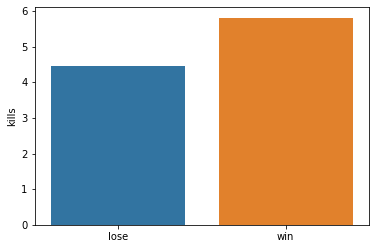

In [22]:
sns.barplot(x=["lose", "win"], y=mean_kda["kills"])

<AxesSubplot:ylabel='assists'>

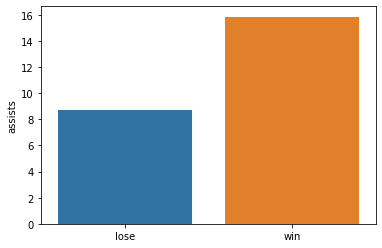

In [23]:
sns.barplot(x=["lose", "win"], y=mean_kda["assists"])

<AxesSubplot:ylabel='deaths'>

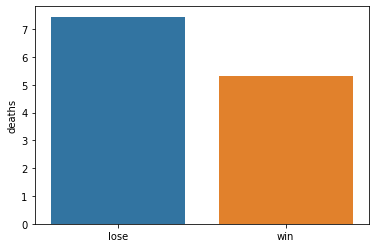

In [24]:

sns.barplot(x=["lose", "win"], y=mean_kda["deaths"])

<AxesSubplot:ylabel='kda'>

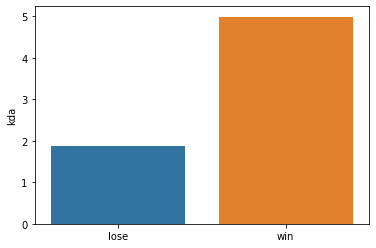

In [25]:
sns.barplot(x=["lose", "win"], y=mean_kda["kda"])

## 데이터 한 눈에 보기

In [26]:
data_kda.describe()

,kills,assists,deaths,kda
count,100.000000,100.000000,100.000000,100.000000
mean,5.180000,12.510000,6.310000,3.525994
std,3.870061,9.564766,3.526795,3.223907
min,0.000000,0.000000,0.000000,-1.000000
25%,2.750000,4.000000,3.000000,1.321429
50%,4.000000,9.500000,7.000000,2.954545
75%,7.000000,20.000000,9.000000,4.446429
max,23.000000,33.000000,14.000000,20.000000


# LCK 따라잡기
## to-do
- ~~KDA~~
- ~~DPM~~ (분당 데미지)
- ~~DMG%~~ (팀 내 데미지 비율)
- DMG/GOLD (골드 당 데미지)
- CSD@15 (15분 CS 차이)
- GD@15 (15분 골드 차이)
- JP-D (정글러 관여율 차이)
+ DMG@END, DMG@15
+ 주라인에 따른 위의 통계량


### KDA

In [27]:
kda.head()

0    2.111111
1    1.111111
2    1.000000
3    1.600000
4    2.000000
Name: kda, dtype: float64

### DPM

In [28]:
### DPM
minute_played = data.timePlayed/60
dpm_all = (data.totalDamageDealt/minute_played)
dpm_to_champions = data.totalDamageDealtToChampions/minute_played
dpm = pd.concat([dpm_all, dpm_to_champions], axis=1, keys=["dpm_all", "dpm_to_champions"])
display(dpm)
# additional
display(data.totalTimeSpentDead.describe()/60)
display(data_kda.describe())
display(data.totalMinionsKilled.describe())

,dpm_all,dpm_to_champions
0,2541.532004,843.525708
1,3749.178295,591.689922
2,2797.524116,573.231511
3,5493.585237,620.272408
4,3980.109170,690.327511
...,...,...
95,1674.051928,744.547600
96,5951.055319,680.655319
97,2901.543461,1416.068237
98,2296.599050,567.863617


count     1.666667
mean      2.974500
std       2.088225
min       0.000000
25%       1.300000
50%       2.916667
75%       4.437500
max      11.900000
Name: totalTimeSpentDead, dtype: float64

,kills,assists,deaths,kda
count,100.000000,100.000000,100.000000,100.000000
mean,5.180000,12.510000,6.310000,3.525994
std,3.870061,9.564766,3.526795,3.223907
min,0.000000,0.000000,0.000000,-1.000000
25%,2.750000,4.000000,3.000000,1.321429
50%,4.000000,9.500000,7.000000,2.954545
75%,7.000000,20.000000,9.000000,4.446429
max,23.000000,33.000000,14.000000,20.000000


count    100.000000
mean      77.430000
std       59.055915
min        7.000000
25%       29.000000
50%       49.000000
75%      123.000000
max      223.000000
Name: totalMinionsKilled, dtype: float64

In [29]:
print("가장 오래 죽어있던 시간")
display(data[["kills","assists","deaths","totalTimeSpentDead","championName","timePlayed"]].loc[data.totalTimeSpentDead==714])
print("가장 쩔었던 순간 (perfect 스코어 제외)")
display(data[["kills","assists","deaths","totalTimeSpentDead","championName","timePlayed"]].loc[data_kda.kda==data_kda.kda.max()])
print("가장 미니언을 많이 먹은 날")
display(data[["kills","assists","deaths","totalTimeSpentDead","championName","timePlayed","totalMinionsKilled"]].loc[data.totalMinionsKilled==data.totalMinionsKilled.max()])
# data.timePlayed

가장 오래 죽어있던 시간


,kills,assists,deaths,totalTimeSpentDead,championName,timePlayed
75,14,15,14,714,Brand,2911


가장 쩔었던 순간 (perfect 스코어 제외)


,kills,assists,deaths,totalTimeSpentDead,championName,timePlayed
62,3,17,1,16,Senna,718


가장 미니언을 많이 먹은 날


,kills,assists,deaths,totalTimeSpentDead,championName,timePlayed,totalMinionsKilled
49,10,10,5,247,Sion,2194,223


### DMG%

In [59]:
sum_dmg_per = 0
for i in range(len(data)):
    dmg_team = 0
    dmg_me = 0
    for j in range(10):
        if (df_participants.iloc[i*10 + j].puuid == summoner_puuid):
            dmg_me = dmg_me + df_participants.iloc[i*10 + j].totalDamageDealtToChampions
        dmg_team = dmg_team + df_participants.iloc[i*10 + j].totalDamageDealtToChampions
    dmg_per = dmg_me/dmg_team
    sum_dmg_per = sum_dmg_per + dmg_per
print("DMG%% = %.2f" % (sum_dmg_per/len(data)))
# DMG_(data.totalDamageDealtToChampions / (data.timePlayed/60)).describe()
# data.totalDamageDealtToChampions[0]
# (data.timePlayed/60)[0]
# data.totalDamageDealtToChampions[0] / (data.timePlayed/60)[0]

DMG% = 0.09


### DMG/GOLD

In [70]:
dmg = data.totalDamageDealtToChampions
gold = data.goldEarned
dmg_by_gold = dmg/gold

print("DMG/GOLD = %.2f" % dmg_by_gold.mean())
# data.totalDamageDealtToChampions[0]
# data.totalDamageDealtToChampions[0], (data.goldEarned[0])
# dmg_by_gold.describe()

DMG/GOLD = 1.52


## API - timeline 가져오기

In [179]:
with open("data/data_summoner_match_timeline_data_야식은치킨이지.json", "r") as file:
    json_data = json.load(file)
tl_meta = [match["metadata"] for match in json_data]
df_tl_meta = pd.json_normalize(tl_meta)
tl_info = [match["info"]["frames"] for match in json_data]
frame_interval = 60000  # maybe 60 * 1000 milliseconds


## 포지션 정보 가져오기

In [275]:
pd.concat([data.lane, data.individualPosition], axis=1).head()

,lane,individualPosition
0,NONE,Invalid
1,TOP,TOP
2,BOTTOM,BOTTOM
3,BOTTOM,BOTTOM
4,NONE,TOP
...,...,...
95,JUNGLE,Invalid
96,BOTTOM,BOTTOM
97,TOP,Invalid
98,BOTTOM,UTILITY


In [127]:
df_info.iloc[data.lane[invalid_index].index].gameMode.head()

0     ARAM
9     ARAM
10    ARAM
11    ARAM
13    ARAM
Name: gameMode, dtype: object

    라인을 알 수 없는 경우는 주로 칼바람이나 넥서스 파괴 모드 등 특별한 모드이다

In [123]:
position = data.individualPosition.copy()
valid_index = position != "Invalid"
(pd.concat([data.lane, data.individualPosition], axis=1).iloc[data.lane[valid_index].index]).head()

,lane,individualPosition
1,TOP,TOP
2,BOTTOM,BOTTOM
3,BOTTOM,BOTTOM
4,NONE,TOP
5,BOTTOM,BOTTOM


## 맞 라인의 적 정보 가져오기
- 여기서부턴 경기 index를 사용하였음

    timeline에선 참가자 id가 1~10으로 설정되어 있다는 점을 주의해주어야 합니다.

In [286]:
match_index = 1
summoner_position = data.individualPosition[match_index]
participant = df_participants.iloc[match_index*10: match_index*10+10].reset_index() # index 초기화 중요
jungler_index = [-1, -1]
for i in range(10):
    # 정글러 구하기
    if participant.individualPosition[i] == "JUNGLE":
        if i < 5: jungler_index[0] = i
        else: jungler_index[1] = i
    # 내 index 구하기
    if participant.puuid[i] == summoner_puuid: 
        summoner_index = i
        if summoner_index < 5 : summoner_team = 0   # 0: blue / 1: red
        else: summoner_team = 1
    # 맞라인 상대의 정보 구하기
    elif participant.individualPosition[i] == summoner_position:
        rival = participant.iloc[i]
        rival_index = i

### CSD@15 (15분 CS 차이)
- 팀 데이터가 아닌, 맞라이너와의 차이를 구해보았음

In [246]:
tl_participants_frames = [tl_info[match_index][t]["participantFrames"] for t in range(len(tl_info[match_index]))]
# df_tl_participants_frames = pd.DataFrame.from_dict(tl_participants_frames)
tl_15_participants_frames = tl_participants_frames[15]  # 15분 데이터
df_tl_15_participants_frames = pd.json_normalize([tl_15_participants_frames[str(x+1)] for x in range(10)])

In [257]:
df_tl_15_participants_frames.minionsKilled[summoner_index] - df_tl_15_participants_frames.minionsKilled[rival_index]

52

### GD@15 (15분 골드 차이)

In [259]:
df_tl_15_participants_frames.totalGold[summoner_index] - df_tl_15_participants_frames.totalGold[rival_index]

1558

### JP-D (정글러 관여율 차이)

## 킬 이벤트 가져오기

In [420]:
tl_events = [tl_info[match_index][t]["events"] for t in range(len(tl_info[match_index]))]
tl_kill_events = []
for i in range(len(tl_events)):
    for event in tl_events[i]:
        if event["type"] == "CHAMPION_KILL":
            tl_kill_events.append(pd.json_normalize(event))
df_kill_events = pd.concat(tl_kill_events).reset_index()
del df_kill_events['index']

## 정글러 정보 가져오기

In [428]:
print(summoner_index+1, jungler_index[summoner_team]+1, "/", rival_index+1, jungler_index[summoner_team != 1]+1)
# NaN 값 처리 - 빈 list를 넣어줌
d = df_kill_events
d.assistingParticipantIds = [[] if x is np.NaN else x for x in d.assistingParticipantIds]   # is를 써야 하는 이유 : NaN 값은 언제나 다른 값이므로 객체를 비교해야합니다.

6 7 / 4 5


In [429]:
# mask 생성
mask_summoner_kill = d.killerId == summoner_index+1
# mask_summoner_assist = 
d.assistingParticipantIds.map(lambda arr : summoner_index+1 in arr)
# mask_summoner_jungler_assist = d.killerId == summoner_index+1
# print(mask_summoner_kill)
# df_kill_events[]
# df_kill_events[(d.killerId == summoner_index+1) & d.assistingParticipantIds.map(lambda x: False if type(x) == float else jungler_index[summoner_team]+1 in x)]


0       [8, 10]
1       [8, 10]
2           [8]
3            []
4           [2]
        ...    
59          [2]
60       [1, 3]
61    [1, 2, 3]
62    [1, 2, 3]
63       [3, 5]
Name: assistingParticipantIds, Length: 64, dtype: object